In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#importando dados
data = pd.read_csv('dados/nomes.csv')

In [23]:
df = pd.DataFrame(data)

In [24]:
# Codificar os rótulos (masculino = 0, feminino = 1)
label_encoder = LabelEncoder()
df['genero'] = label_encoder.fit_transform(df['genero'])

In [25]:
# Tokenizar os nomes
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['nome'])
sequences = tokenizer.texts_to_sequences(df['nome'])
max_len = max(len(x) for x in sequences)
X = pad_sequences(sequences, maxlen=max_len)
y = df['genero'].values

In [26]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Definir a arquitetura do modelo
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8),
    SpatialDropout1D(0.2),
    LSTM(16, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [53]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.4852 - loss: 0.6936 - val_accuracy: 0.5128 - val_loss: 0.6913
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5688 - loss: 0.6907 - val_accuracy: 0.7179 - val_loss: 0.6887
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6809 - loss: 0.6880 - val_accuracy: 0.7436 - val_loss: 0.6853
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7391 - loss: 0.6847 - val_accuracy: 0.8462 - val_loss: 0.6806
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7858 - loss: 0.6794 - val_accuracy: 0.8462 - val_loss: 0.6739
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7780 - loss: 0.6728 - val_accuracy: 0.8718 - val_loss: 0.6646
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7985 - loss: 0.6637 - val_accuracy: 0.7949 - val_loss: 0.6527
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7512 - loss: 0.6581 - val_accuracy: 0.7949 - va

In [56]:
# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9007 - loss: 0.3325 
Test accuracy: 0.8979591727256775


In [60]:
# Função para prever o gênero de um novo nome
def descobrir_genero(nome):
    seq = tokenizer.texts_to_sequences([nome])
    padded = pad_sequences(seq, maxlen=max_len)
    prediction = model.predict(padded)
    return 'feminino' if prediction < 0.5 else 'masculino'

In [61]:
# Exemplo de uso
novo_nome = 'claudia'
genero = descobrir_genero(novo_nome)
print(f"O gênero previsto para o nome {novo_nome} é: {genero}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
O gênero previsto para o nome claudia é: feminino


In [62]:
nomes_para_testar = [
    'joão', 'maria', 'pedro', 'ana', 'carlos', 'luciana', 'gustavo', 'julia', 
    'fernando', 'camila', 'luiz', 'raquel', 'rodrigo', 'valentina', 'leonardo', 
    'alice', 'ricardo', 'beatriz', 'mateus', 'laura', 'eduardo', 'isabela', 'guilherme'
]

In [63]:
for nome in nomes_para_testar:
    genero = descobrir_genero(nome)
    print(f" {nome} é: {genero}")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
 joão é: masculino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
 maria é: feminino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
 pedro é: masculino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
 ana é: feminino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
 carlos é: masculino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
 luciana é: feminino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 gustavo é: masculino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 julia é: feminino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 fernando é: masculino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
 camila é: feminino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 luiz é: feminino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 raquel é: masculino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
 rodrigo é: masculino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 valentina é: feminino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 leonardo é: masculino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 alice é: feminino
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
 ricardo é: masculino
1/1 ━

In [84]:
descobrir_genero('wesley')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'feminino'

In [86]:
# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9007 - loss: 0.3325 
Test accuracy: 0.8979591727256775


In [93]:
# Gerar previsões probabilísticas para os dados de teste
y_pred_prob = model.predict(X_test)




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [95]:
# Ajustar as previsões para classes binárias (0 ou 1)
y_pred = (y_pred_prob > 0.5).astype(int)



In [112]:

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[22  4]
 [ 1 22]]


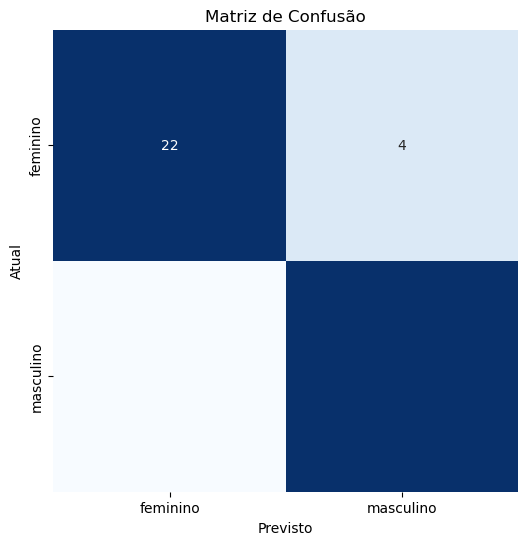

In [122]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matriz de Confusão')
plt.show()